**Pandas homework**

*Part 1. Nucleotides frequency diagram*

Firstly we need to import all libraries:

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
from statsmodels.graphics.gofplots import qqplot

Now we can upload the data and take a look at it:

In [179]:
df = pd.read_csv("train.csv")
df.head()

,pos,reads_all,matches,mismatches,deletions,insertions,A,C,T,G,A_fraction,T_fraction,G_fraction,C_fraction
0,279,8045,32,7972,46,8,7911.0,54.0,11.0,NaN,0.983503,0.000815,NaN,0.006896
1,280,8045,7995,48,19,9,NaN,16.0,13.0,19.0,NaN,0.001355,0.002392,0.001914
2,281,8045,7983,50,16,5,NaN,24.0,4.0,24.0,NaN,0.000639,0.002875,0.002310
3,282,8049,7510,505,33,65,105.0,11.0,395.0,NaN,0.012750,0.049096,NaN,0.000919
4,283,8042,7786,155,115,62,46.0,NaN,93.0,31.0,0.004960,0.010992,0.003186,NaN


We need to extract only columns with nucleotides frequency (y axis) and their position (x axis):

In [181]:
actg = df[['pos', 'A', 'C', 'T', 'G']]
actg = actg.set_index('pos') # set index from pos column
actg.head()

,A,C,T,G
pos,,,,
279,7911.0,54.0,11.0,NaN
280,NaN,16.0,13.0,19.0
281,NaN,24.0,4.0,24.0
282,105.0,11.0,395.0,NaN
283,46.0,NaN,93.0,31.0


Let's construct the stacked barplot based on this data:

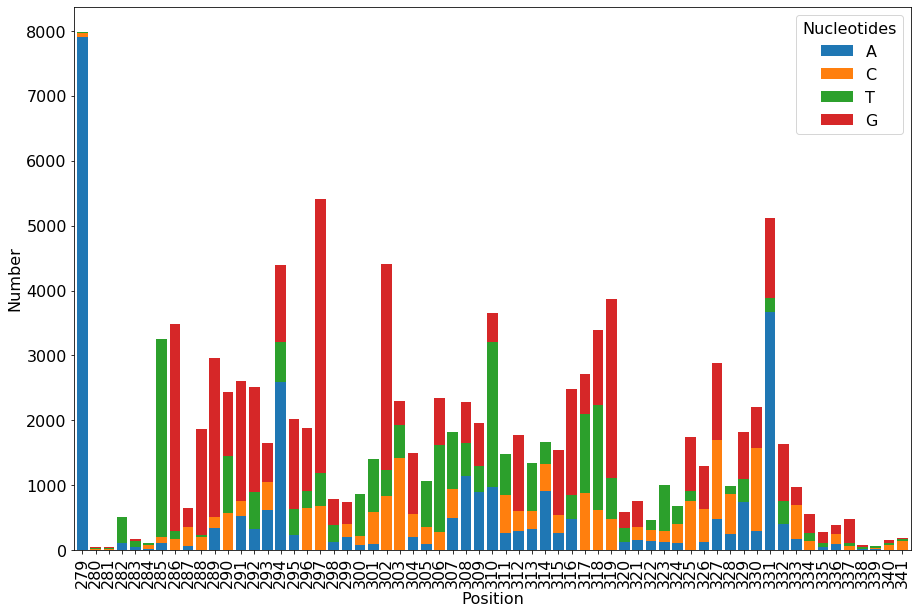

In [180]:
ax = actg.plot(kind='bar', stacked=True, width = 0.8, figsize=(15, 10))

ax.set_ylabel('Number')
ax.set_xlabel('Position')
plt.legend(title='Nucleotides')
#plt.savefig('ACTG.png')  # if needed

As we can see, there can be considerable variability in most positions. However, in some positions only one major nucleotide can be defined. For instance, it is highly likeble to find adenin in 279 position, while timin is most likely to be found in 285 position.

*Part 2. Selection of specified variables*

Let's start from finding mean value for the column, called "matches":

In [18]:
df.matches.mean()

4710.285714285715

Now we can filter rows, in which number of matches is higher than its average:

In [22]:
df = df.query('matches > 4710.285714285715')

And select some of the columns:

In [103]:
df = df[["pos", "reads_all", "matches", "mismatches", "deletions", "insertions"]]

*Part 3. Titanic EDA*

Let's start from uploading the dataset and taking look at it:

In [183]:
titanic = pd.read_csv("train_titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


What is the meaning of variables?

* **Survival** - whether did a passanger survive or not
* **Pclass** - ticket class
* **Sex** - passenger's sex
* **Age** - age in years
* **SibSp** - # of siblings / spouses aboard the Titanic
* **Parch** -  # of parents / children aboard the Titanic
* **Ticket** - ticket number
* **Fare** - Passenger fare
* **Cabin** - Cabin number
* **Embarked** - Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

Now we can obtain some basic statistics (count, mean, sd and quantiles) of numeric columns using `describe` function:

In [189]:
titanic[["Age", "SibSp", "Parch", "Fare"]].describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


This table shows that the oldest passenger was 80 years old, while the mean age was just under 30 years. Moreover, we can see that SibSp and Parch are actually descrete variables, so they may be regarded as factors during further binomial regression analysis. In addition, the most expensive ticket cost over £512, while some passengers managed to board the ship for free (or maybe they are the missing values?)

Let's look on these passengers:

In [190]:
titanic.query('Fare == 0')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


According to the https://www.encyclopedia-titanica.org/, there is no  information about the fare of tickets for these people. Interestingly, Thomas Andrews is among these passengers (line 806). He was a naval architect of Titanic and obviously needn't to pay for the cruise. Thus, some of these zeros are actually missing values, while some reflect the truth. 

Now let's check for missing values with the function `isnull()`

In [191]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are lots of NaNs in the Age and Cabin columns. As far as we can't replace them with mean values, we just left them as they are.

Now we can replace "0" and "1" values in the Survived variable with "Yes" and "No" respectively in order to make it easier to understand:

In [147]:
titanic.Survived = titanic.Survived.apply(lambda x: "No" if x == 0 else "Yes")

From what we saw, outliers may be found in Fare variables, let's check it:

In [200]:
from scipy import stats
titanic[np.abs(stats.zscore(titanic.Fare)) > 3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


I checked some of these names in https://www.encyclopedia-titanica.org/ and found out that they really paid so much money for this trip. No outliers.

We should next check if the Age, Fair, Parch and SibSp variables are distributed normally. We can see it on histograms, or special qqplot:

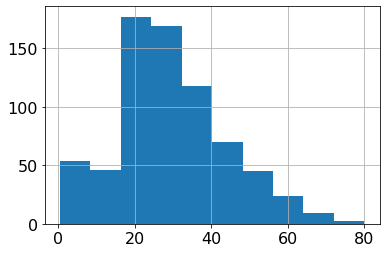

In [208]:
titanic.Age.hist()

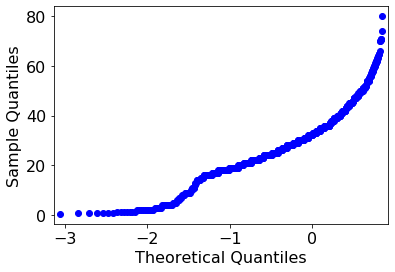

In [213]:
qqplot(titanic.Age, line='s')
plt.show()

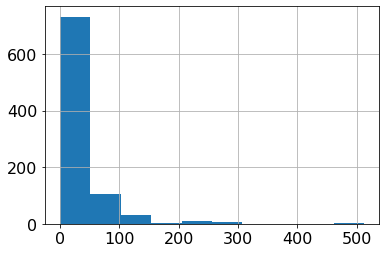

In [209]:
titanic.Fare.hist()

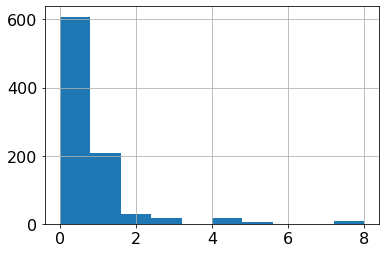

In [214]:
titanic.SibSp.hist()

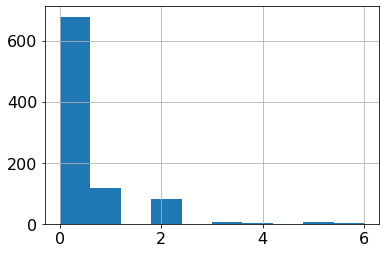

In [215]:
titanic.Parch.hist()

Unfortunately, these figs are quite far from normal distribution. There is not point in checking other variables, as far as most of them are descrete or non-numeric.

On this step we can check, whether any correlations between numeric variables can be found?

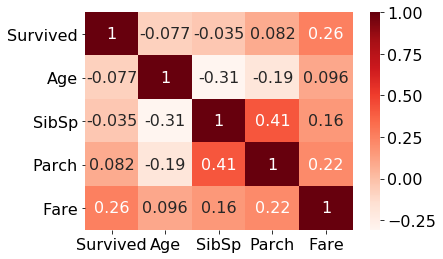

In [193]:
sns.heatmap(titanic[["Survived", "Age", "SibSp", "Parch", "Fare"]].corr(), annot=True, cmap = 'Reds')
plt.show()

Interestingly, there is possible positive correlation between the ticket price and the survival of its owner (r=0.26). Moreover, possible strong correlation may be found between the number of siblings and the number of parents/children, which is quite obvious (r=0.41). In addition, the number of siblings (r=-0.31) or children/parents (r=-0.19) seem to correlate negatively with the age. Finally, the positive correlation is also likely to be found between the number of children/parents (r=0.22) or siblings (0.16) and the fare. It is possible that welthier passengers tended to travel with their families, while the poorer passengers used to travel alone.

Of course, these results are only show us possible ideas for further analysis. If we want to find out real interactions between survival variable and others, we should apply logistic regession, as far as the values of the survival variable are binomial (0/1).

Let's look on the scatterplots instead of raw numbers of correlation coefficients:

/home/daria/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/daria/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


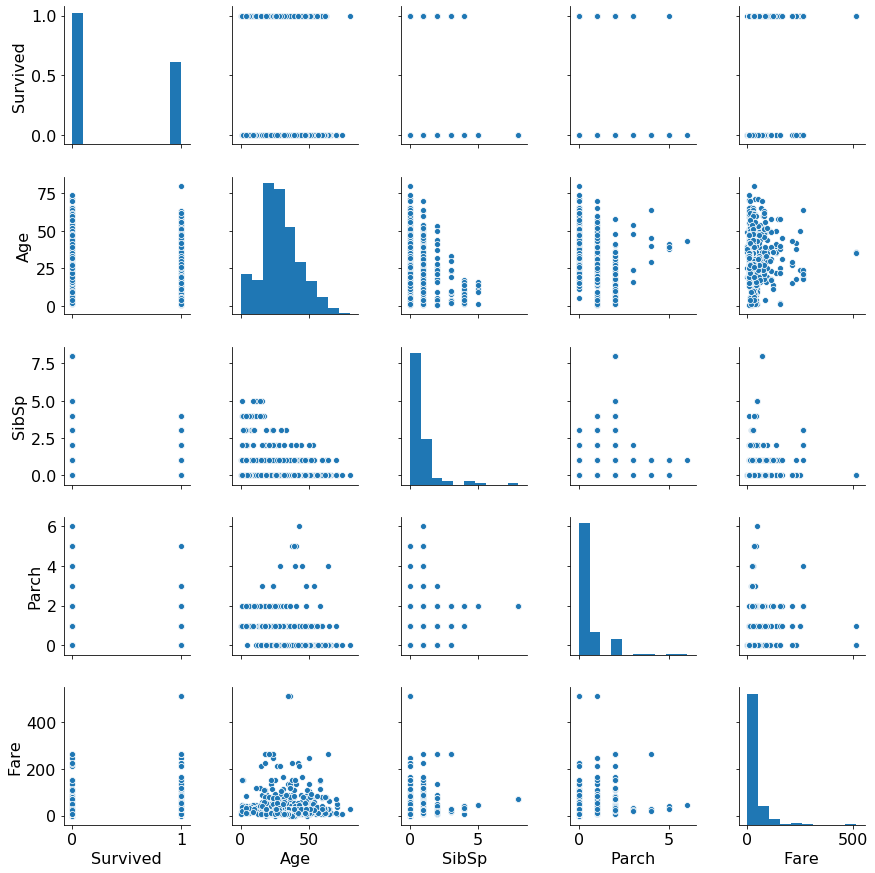

In [194]:
sns.pairplot(data = titanic[["Survived", "Age", "SibSp", "Parch", "Fare"]])

It is quite obvious, that SibSp and Parch are descrete, that is why we should not rely on the correlation results given above. Instead we should apply binomial regression and use these variables as factors.

Moreover, the estimeted correlation between Fare and Survived variables is also unreliable, as far as it resulted from a few very high values of Fare among survived travellers.

Let's look on them:

In [195]:
titanic.query('Fare > 400')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


Only 3 passengers provide the calculated correlation. Again, we should apply binomial regression instead of correlation.

How we can estimate possible interactions between factor variables? During the EDA we can construct *mosaic plot*, which is very insightful! In a mosaic plot, the size of the boxes corresponds to the number of observations contained in their specific categories. Here we also use a colour coding corresponding to a statistical test that tells us whether some boxes are more (blue) or less (red) populated than when assuming independent distributions for the categories. The Pclass values are split vertically and the Sex categories are split horizontally:

Text(0.5, 0, 'Class')

<Figure size 864x576 with 0 Axes>

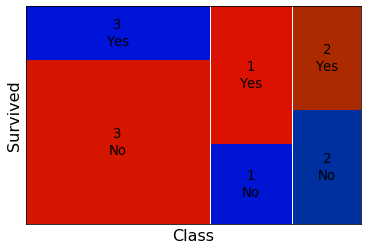

In [159]:
plt.figure(figsize=(12, 8))
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['font.size'] = 16

mosaic(titanic, ['Pclass', 'Survived'], axes_label=False, statistic=True)
plt.ylabel('Survived')
plt.xlabel('Class')

What stands out from this graph is that most third-class passengers did not survive, whereas over half first-class passengers were more successful. As regards the second class, one out of two passengers survived. 

Let's find out, whether the sex of passengers played a great role in surviving. Now the x axis will represent Sex, while the y axis will reflect Survived.

Text(0.5, 0, 'Sex')

<Figure size 864x576 with 0 Axes>

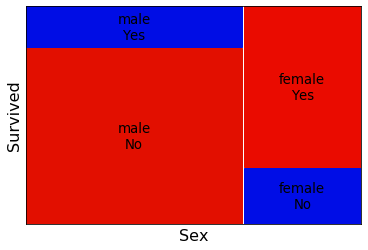

In [162]:
plt.figure(figsize=(12, 8))
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['font.size'] = 16

mosaic(titanic, ['Sex', 'Survived'], axes_label=False, statistic=True)
plt.ylabel('Survived')
plt.xlabel('Sex')

In all likelihood, most women survived, while the majority of men died.

Now let's check the next idea: was the age of passengers associated with their survival?

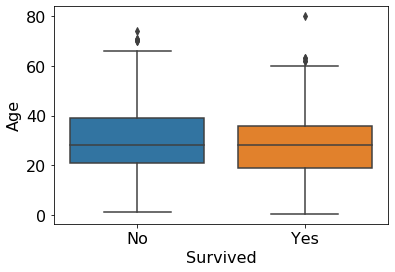

In [166]:
sns.boxplot(titanic.Survived, titanic.Age)
plt.show()

As we can see, there is no big difference in survival between the people of different age. Haven't they shown in the "Titanic" movie, that the children had been sent to lifeboats primarily?!

From this EDA we can conclude, that the major factors which possibly had a great effect on the survival are sex and a ticket class of a passenger.